## Exploratory Data Analysis <a id='1_Exploratory_Data_Analysis'></a>

### 1.1 Table of Contents <a id='1.1_Table_of_Contents'></a>
* [1 Exploratory Data Analysis - West Nile Virus](#1_Exploratory_Data_Analysis)
     * [1.1 Table of Contents](#1.1_Table_of_Contents)
     * [1.2 Imports & Loads](#1.2_Imports)
     * [1.3 Train Data](#1.3_Train_Data)
         * [1.3.1 Distance Split](#1.3.1_Distance_Split)

### 1.2 Imports & Loads <a id='1.2_Imports'></a>

In [1]:
# Import from Data Wrangling Notebook
%store -r station
%store -r spray
%store -r train

# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance
import numpy as np

### 1.3 Trap Exploring <a id='1.3_Train_Data'></a>

#### 1.3.1 Time <a id='1.3.1_Distance_Split'></a>

C:\Users\Xzenc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


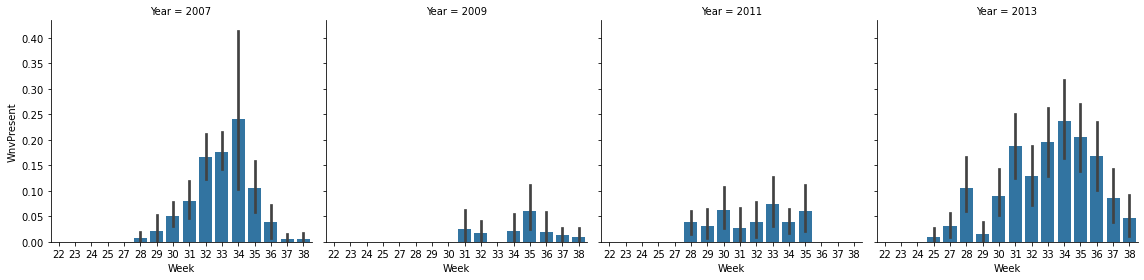

In [2]:
g = sns.FacetGrid(train, col="Year", height=4)
g.map(sns.barplot, "Week", "WnvPresent")

Clearly some peaks around week 34 in 2007 and 2013, while 2009 and 2011 are more subdued. More to investigate here.

In [3]:
species = train[['Species', 'NumMosquitos', 'WnvPresent']].groupby(by='Species').sum().reset_index()
print(species)

                  Species  NumMosquitos  WnvPresent
0         CULEX ERRATICUS             7           0
1           CULEX PIPIENS         44671         184
2  CULEX PIPIENS/RESTUANS         66268         225
3          CULEX RESTUANS         23431          48
4        CULEX SALINARIUS           145           0
5          CULEX TARSALIS             7           0
6         CULEX TERRITANS           510           0


In [ ]:
# total mosquitos in a given week from all years.
df_temp = train.groupby(['Week','Species'], as_index=False).sum().reindex()

fg = sns.lmplot(data=df_temp, x = 'Week', y='NumMosquitos', hue='Species', fit_reg=False);
fg.fig.set_figheight(6)
fg.fig.set_figwidth(15)
fg.fig.suptitle("Total for each species per week over all years");

In [ ]:
# total mosquitos in a given year
df_temp = train.groupby(['Year','Species'], as_index=False).sum().reindex()

fg = sns.lmplot(data=df_temp, x='Year', y='NumMosquitos', hue='Species', fit_reg=False);
fg.fig.set_figheight(6)
fg.fig.set_figwidth(15)
fg.fig.suptitle("Total for each species per year");

Interesting, we can see a clear u shape for both pip/res and pip species and a slow growth of res. Hypothesis: the res type can survive in a wider range of conditions so is active for longer, but pip is overall best suited for propagating in the local environment and is more prone to carrying WNV

In [ ]:
# looking more closely at just the infected species
train_temp = train.loc[train['Species'].isin(['CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS'])]

In [ ]:
# total mosquitos in a given week from all years, really just another way of looking at our first chart but only with wnv ones
df_temp = train_temp.groupby(['Week'], as_index=False).sum().reindex()

fg = sns.lmplot(data=df_temp, x = 'Week', y='NumMosquitos', fit_reg=False);
fg.fig.set_figheight(6)
fg.fig.set_figwidth(15)
fg.fig.suptitle("Total for each species per week over all years");

In [ ]:
df_temp = train_temp.groupby(['Year', 'Species'])['WnvPresent'].sum().unstack().fillna(0)

ax = sns.histplot(
    train_temp,
    x='Year',
    weights='WnvPresent',
    hue='Species',
    multiple='stack',
    edgecolor='white',
    shrink=0.8,
    bins=4
)

ax.set_title('Species with WNV present by year')
ax.set_ylabel(None)

### 1.4 Weather Exploring <a id='1.4_Weather'></a>

#### 1.4.1 Tempature

In [ ]:
temp = station[['Year','Week','TmaxC','TminC','TavgC']]
g = sns.FacetGrid(temp, col="Year", height=4)
g.map(sns.barplot, "Week", "TmaxC")

In [ ]:
Precipitation

In [ ]:
Dew Point

In [ ]:
Wet Bulb

In [ ]:
Heat

In [ ]:
Cool

In [ ]:
StnPressure

In [ ]:
Dew Point

In [ ]:
SeaLevel

In [ ]:
ResultSpeed

In [ ]:
ResultDir

In [ ]:
AvgSpeed

In [ ]:
SnowFall

In [ ]:
Sunrise

Sunset

CodeSum

Relitive Humidity